# Stock Price Trend & Volatility Analysis


## Project Overview

In this project, you will analyze historical stock price data to:

* Visualize **price trends** over time
* Compute and analyze **moving averages**
* Calculate **daily returns** and study **volatility**
* Understand **risk** using return distribution
* (Optional) Build a **simple price prediction model** using Linear Regression

This demonstrates skills in **time series, finance analytics, and visualization**.

## Dataset Information

You can use any stock symbol, for example:

* `AAPL` – Apple
* `MSFT` – Microsoft
* `TSLA` – Tesla
* `^NSEI` – NIFTY 50
* `^BSESN` – SENSEX

We’ll fetch data using **yfinance** (no manual download needed).

Data columns:

* `Open`
* `High`
* `Low`
* `Close`
* `Adj Close`
* `Volume`

Each row corresponds to a trading day.

## Setup & Imports

In [1]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

## Load Stock Data

Pick a ticker and a time range:

In [2]:
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
data.head()

/tmp/ipython-input-3016649525.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237553,24.705322,23.798602,24.694237,212818400
2015-01-05,23.554739,24.086799,23.368519,24.006990,257142000
2015-01-06,23.556963,23.816342,23.195604,23.619036,263188400
2015-01-07,23.887274,23.987034,23.654497,23.765343,160423600
2015-01-08,24.805084,24.862725,24.097887,24.215385,237458000


## Basic Data Exploration

In [3]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2516 non-null   float64
 1   (High, AAPL)    2516 non-null   float64
 2   (Low, AAPL)     2516 non-null   float64
 3   (Open, AAPL)    2516 non-null   float64
 4   (Volume, AAPL)  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,93.858935,94.770441,92.845267,93.772109,1.170853e+08
std,65.441289,66.034713,64.754619,65.361077,6.839614e+07
min,20.604080,20.907414,20.405658,20.526533,2.323470e+07
25%,35.222952,35.620863,34.844884,35.243153,7.105610e+07
50%,64.388039,64.942763,63.586086,64.228554,1.003646e+08
75%,150.234020,151.982058,148.267724,150.056778,1.426216e+08
max,257.853760,258.928914,256.470034,257.027510,6.488252e+08


**Observations:**

* Number of trading days: …
* Date range: …
* Any missing values?

Check missing:

In [4]:
data.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


##  Visualizing Closing Price Trend

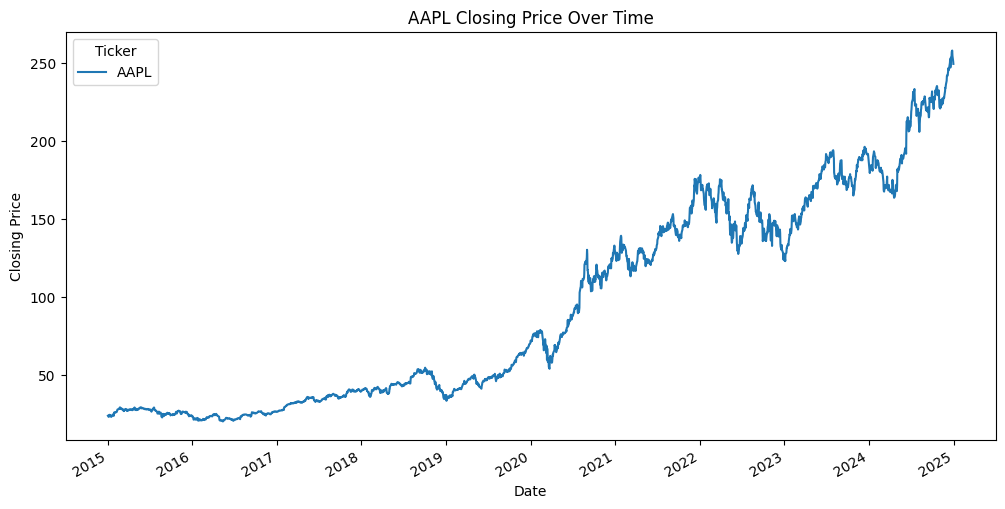

In [5]:
data["Close"].plot(figsize=(12,6))
plt.title(f"{ticker} Closing Price Over Time")
plt.ylabel("Closing Price")
plt.xlabel("Date")
plt.show()

**Insight:**

* General trend: upward
* Any visible crashes or rallies

## Moving Averages (Short vs Long Term Trend)

We’ll calculate 20-day and 50-day moving averages.

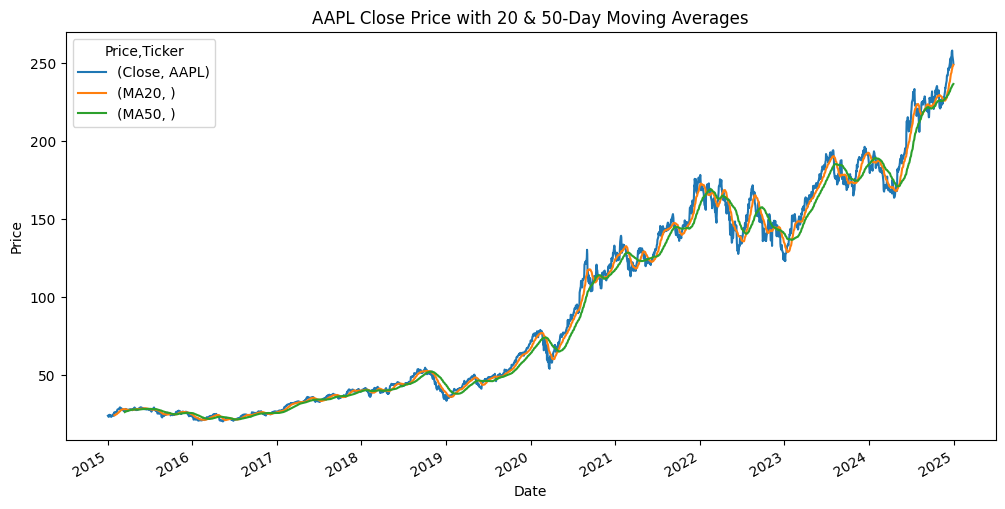

In [6]:
data["MA20"] = data["Close"].rolling(window=20).mean()
data["MA50"] = data["Close"].rolling(window=50).mean()

data[["Close", "MA20", "MA50"]].plot(figsize=(12,6))
plt.title(f"{ticker} Close Price with 20 & 50-Day Moving Averages")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

**Explain in report:**

* When MA20 crosses above MA50 → bullish crossover (uptrend signal)
* When MA20 crosses below MA50 → bearish crossover

You don’t need to code crossover detection, just visually interpret.

##  Daily Returns & Volatility

### Calculate Daily Returns

In [7]:
data["Daily_Return"] = data["Close"].pct_change()
data["Daily_Return"].head()

,Daily_Return
Date,
2015-01-02,NaN
2015-01-05,-0.028172
2015-01-06,0.000094
2015-01-07,0.014022
2015-01-08,0.038423


Line plot:


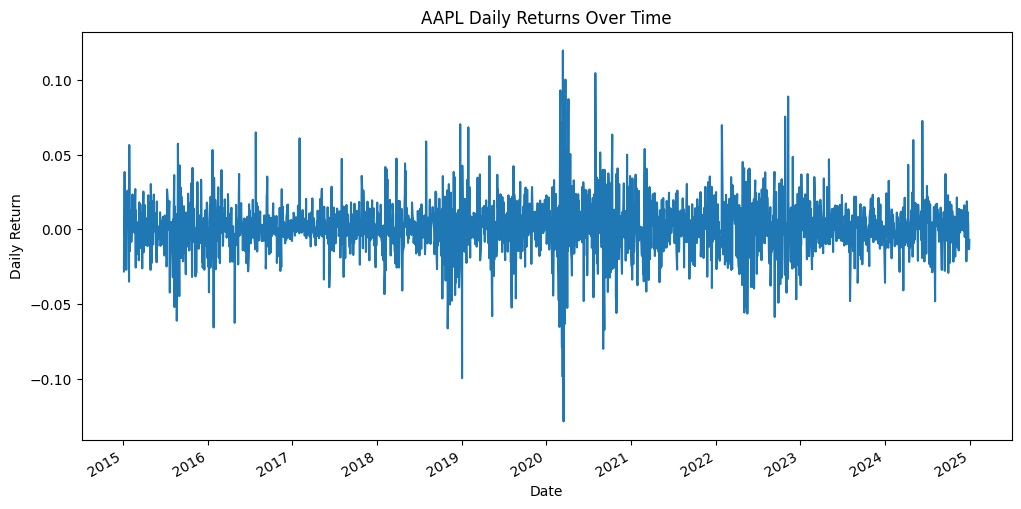

In [8]:
data["Daily_Return"].plot(figsize=(12,6))
plt.title(f"{ticker} Daily Returns Over Time")
plt.ylabel("Daily Return")
plt.xlabel("Date")
plt.show()

### Distribution of Daily Returns

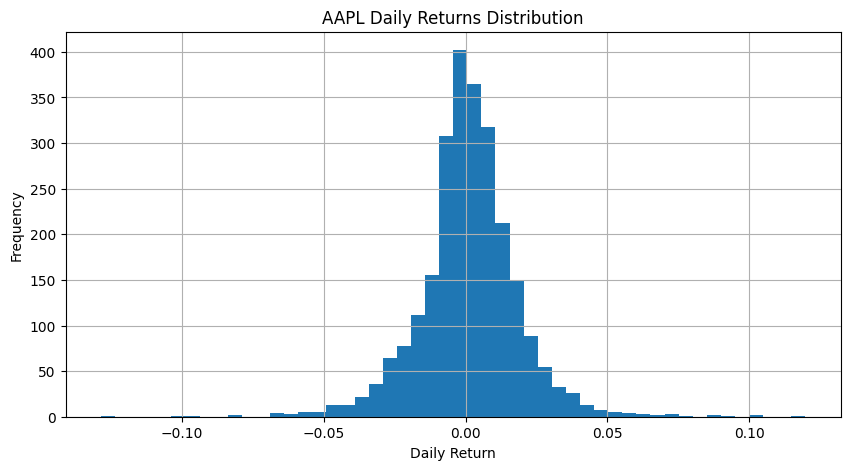

,Daily_Return
count,2515.000000
mean,0.001088
std,0.017929
min,-0.128647
25%,-0.007326
50%,0.001000
75%,0.010142
max,0.119808


In [9]:
data["Daily_Return"].hist(bins=50, figsize=(10,5))
plt.title(f"{ticker} Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

data["Daily_Return"].describe()

* Mean daily return ~ 0.001088
* Standard deviation (volatility) ~ 0.017929


## Rolling Volatility

You can compute a 30-day rolling standard deviation:

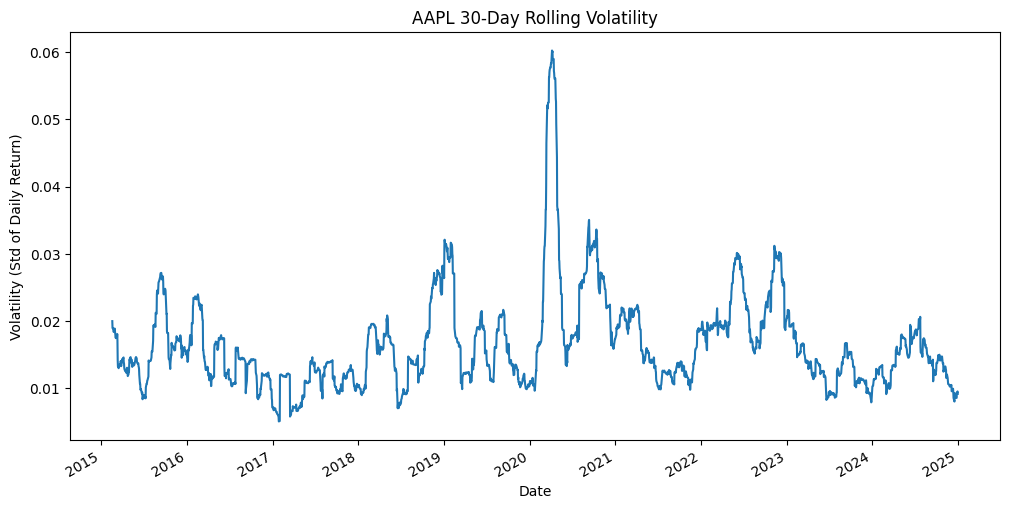

In [10]:
data["Rolling_Volatility_30D"] = data["Daily_Return"].rolling(window=30).std()

data["Rolling_Volatility_30D"].plot(figsize=(12,6))
plt.title(f"{ticker} 30-Day Rolling Volatility")
plt.ylabel("Volatility (Std of Daily Return)")
plt.xlabel("Date")
plt.show()

**Insight:**

* Periods with higher volatility (crisis times)
* Periods with calm (low volatility)

##  Simple Price Prediction with Linear Regression


We’ll try to predict closing price based on time index.

### 10.1 Prepare data

In [11]:
data_model = data.dropna().copy()

# Reset index to use integer time
data_model = data_model.reset_index()

# Create a simple time index feature
data_model["TimeIndex"] = range(len(data_model))

X = data_model[["TimeIndex"]]
y = data_model["Close"]

### Train-test split

We’ll use the **earlier data for training**, later data for testing (no shuffle):

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

###  Train Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(752.2143967471911, -0.0160348458574735)

###  Plot Actual vs Predicted

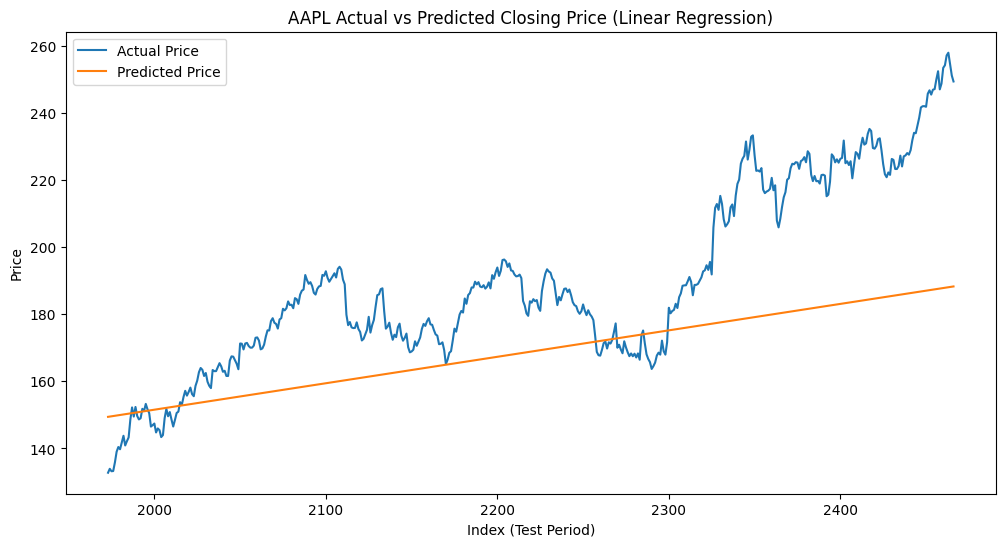

In [14]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label="Actual Price")
plt.plot(y_test.index, y_pred, label="Predicted Price")
plt.title(f"{ticker} Actual vs Predicted Closing Price (Linear Regression)")
plt.xlabel("Index (Test Period)")
plt.ylabel("Price")
plt.legend()
plt.show()

* Linear regression is too simple for complex stock prices
* Good for demonstrating modeling, not real forecasting

## 🔹 11. Final Insights (to write in your notebook/README)

You should summarize things like:

✔ Overall trend of the stock (strong uptrend, fluctuating, sideways)

✔ Average daily return and volatility

✔ Periods of high volatility (e.g., COVID period if visible)

✔ How frequently moving averages cross

✔ Whether the stock is relatively risky (high std of returns)

✔ Linear Regression gives limited predictive power (mention R² score)

## 🔹 13. Conclusion

This project demonstrates:

* Time series handling
* Financial return analysis
* Volatility study
* Simple predictive modeling
* Data visualization & interpretation
